# Evaluation of Analytical Models for Channel Transmission Efficiency in Base Stations Using Monte Carlo Simulations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

##Parámetros

In [2]:
M = 100 # Number of Base station channel (preambulos)
N = 200 # Number of devices
K = [10**k for k in range(1,6)] # Number of simulations

#Modelado Analitico

## Contexto y Supuestos


- **Selección Uniforme de Canales**:
    
    Cada uno de los 10 canales tiene una probabilidad de `1/M` de ser elegido por cualquier dispositivo.

- **Distribución de Dispositivos**:

    Hay `N` dispositivos en total.


- Éxito del Suceso:
  
    Un suceso exitoso ocurre cuando un canal es elegido solo por un dispositivo.

- Distribución de Poisson:

  La probabilidad de un suceso correcto sigue una distribución de Poisson, donde `X` es la cantidad de dispositivos que se conectaron solo a un canal y `N` es el número total de dispositivos.

\begin{equation}
\
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
\
\end{equation}

Donde
𝑘
=
1 (queremos exactamente un dispositivo en un canal) y
𝑝 = 1/`M`
 .

La media
𝜆 para la distribución de Poisson es
𝑛⋅𝑝
En nuestro caso:

In [3]:
#Cantidad media de dispositivos que se conectaron con suceso
mean_poisson = N * (1/M)
mean_poisson

2.0

Entonces, la probabilidad de que exactamente un dispositivo se conecte a un canal específico (y los demás no se conecten a ese canal) usando la distribución de Poisson es:

\begin{equation}
\
P(X = 1) = \frac{\lambda^1 e^{-\lambda}}{1!} = \frac{2^1 e^{-2}}{1} = 2e^{-2}
\
\end{equation}

In [4]:
mean_poisson * math.exp(-mean_poisson)

0.2706705664732254

Paso 5: Probabilidad Total de un Suceso Correcto


Dado que hay 10 canales, y cada uno tiene la misma probabilidad de ser seleccionado solo una vez:

\begin{equation}
\
P(\text{un suceso correcto}) = M \cdot P(X = 1) = M \cdot 2e^{-2} = M\cdot2e^{-2}
\
\end{equation}

In [5]:
import math
p_suceso = M * mean_poisson * math.exp(-mean_poisson)
p_suceso

27.06705664732254

In [6]:
base_station_channel ={

  }

users = list(range(N))

In [7]:
# create base station channels
for channel_id in range(M):
  base_station_channel[str(channel_id)] = []

In [8]:
#Cantidad de canales
#base_station_channel

In [9]:
## Transmisiones bien sucedidas
import pandas as pd
data_results = {
    'iteration':[],
    'success_transmition':[],
    'collision_transmition':[],
    'preambles_not_selected' : []
}

for iter in K:
  for i in range(iter):

    ## assign a user to base station channel
    for user in users:
      random_channel = random.choice(list(base_station_channel.keys())) ## choice
      base_station_channel[str(random_channel)].append(user) ## add user to preambule

    #Store success channels
    results_success=[]

    ## Store when collition exist
    results_collision=[]

    ## Preambles that not used
    results_preamble_not_selected = []




    #Verificamos los usuarios que eligieron un solo preámbulo - success
    results_success.append([k for k, v in base_station_channel.items() if len(v) == 1])

    #Verificamos los usuarios que eligieron más de un preambulo  - success
    results_collision.append([k for k, v in base_station_channel.items() if len(v) > 1])

    #Verificamos los preambulos que no fueron elegidos por ningun usuario
    results_preamble_not_selected.append([k for k, v in base_station_channel.items() if len(v) == 0])




    ##  Cantidad de canales elegidos solo por u usuario entre el total de canales (transmisiones bien sucedidas)
    p_suceso = (len(results_success[0])/M)
    #print(f'k = {i} - p = {p_suceso}')

    ##  Cantidad de canales elegidos por más de un usuario entre el total de canales (Collition de preámbulo)
    p_collition = (len(results_collision[0])/M)

    ##  Cantidad % de canales que no fueron elegidos por ningun dispositivo
    p_preamble_not_selected = (len(results_preamble_not_selected[0])/M)






    data_results['iteration'].append(i)
    data_results['success_transmition'].append(p_suceso)
    data_results['collision_transmition'].append(p_collition)
    data_results['preambles_not_selected'].append(p_preamble_not_selected)

    #reiniciar valores
    results_success=[]
    results_collision=[]
    for k in base_station_channel: base_station_channel[k].clear()

  df=pd.DataFrame(data_results)
  df.to_csv(f'results_k_{iter}.csv')
  data_results = {
    'iteration':[],
    'success_transmition':[],
    'collision_transmition':[],
    'preambles_not_selected' : []
  }





# Analytics

In [10]:
# Crear DataFrames de ejemplo
df_10 = pd.read_csv('/content/results_k_10.csv')
df_100 = pd.read_csv('/content/results_k_100.csv')
df_1000 = pd.read_csv('/content/results_k_1000.csv')
df_10000 = pd.read_csv('/content/results_k_10000.csv')
df_100000 = pd.read_csv('/content/results_k_100000.csv')

# Diccionario de DataFrames y sus iteraciones
dataframes = {
    'df_10': 10,
    'df_100': 100,
    'df_1000': 1000,
    'df_10000': 10000,
    'df_100000': 100000
}

# Lista para almacenar los DataFrames con la columna adicional
updated_dfs = []

# Iterar sobre los DataFrames y agregar la columna de iteraciones
for df_name, iterations in dataframes.items():
    df = globals()[df_name].copy()  # Obtener el DataFrame por su nombre
    df['iterations'] = iterations  # Agregar la columna de iteraciones
    updated_dfs.append(df)  # Agregar el DataFrame actualizado a la lista

# Concatenar todos los DataFrames en uno solo
combined_df = pd.concat(updated_dfs, ignore_index=True)

# Mostrar el DataFrame combinado
combined_df.head()

,Unnamed: 0,iteration,success_transmition,collision_transmition,preambles_not_selected,iterations
0,0,0,0.30,0.61,0.09,10
1,1,1,0.25,0.58,0.17,10
2,2,2,0.25,0.62,0.13,10
3,3,3,0.31,0.58,0.11,10
4,4,4,0.27,0.60,0.13,10


In [15]:
df_data = pd.read_csv('/content/results_k_100000.csv')

In [16]:
df_data

,Unnamed: 0,iteration,success_transmition,collision_transmition,preambles_not_selected
0,0,0,0.20,0.65,0.15
1,1,1,0.23,0.60,0.17
2,2,2,0.22,0.61,0.17
3,3,3,0.26,0.59,0.15
4,4,4,0.32,0.56,0.12
...,...,...,...,...,...
99995,99995,99995,0.21,0.61,0.18
99996,99996,99996,0.32,0.60,0.08
99997,99997,99997,0.23,0.66,0.11
99998,99998,99998,0.29,0.56,0.15


K = 10

In [31]:
k= 100000

In [32]:
df_k_10 = combined_df[combined_df['iterations']==k].reset_index()
df_k_10.head()

,index,Unnamed: 0,iteration,success_transmition,collision_transmition,preambles_not_selected,iterations
0,11110,0,0,0.20,0.65,0.15,100000
1,11111,1,1,0.23,0.60,0.17,100000
2,11112,2,2,0.22,0.61,0.17,100000
3,11113,3,3,0.26,0.59,0.15,100000
4,11114,4,4,0.32,0.56,0.12,100000


## Mean Success Transmition

In [34]:
## Simulation
p_x_1_sim = df_k_10['success_transmition'].mean()
print(f'Probabilidad de suceso - Montecarlo: {p_x_1_sim*M}')


Probabilidad de suceso - Montecarlo: 27.07228


In [35]:
# Analytical Model
p_x_1 = mean_poisson * math.exp(-mean_poisson)
print(f'Probabilidad de suceso - Analítico: {p_x_1*M}')


Probabilidad de suceso - Analítico: 27.06705664732254


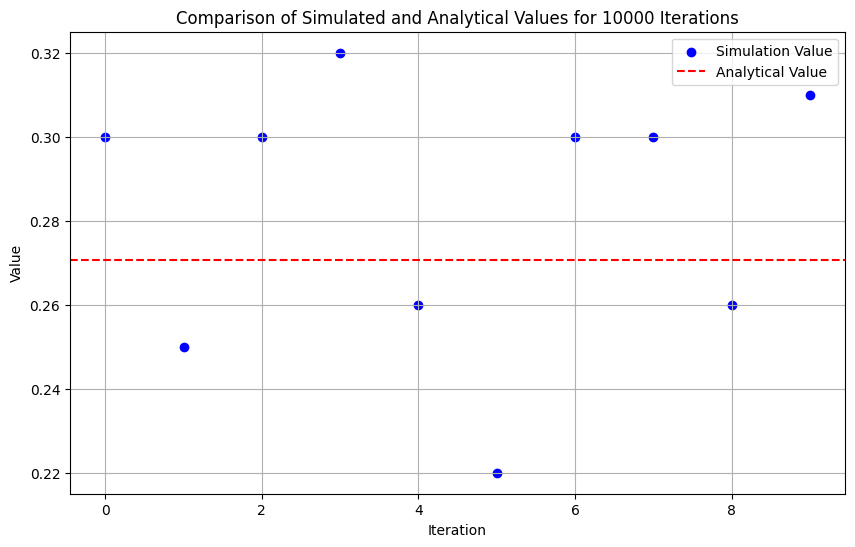

In [ ]:
# Definir el valor analítico para lambda = 2
analytical_value = p_x_1

# Filtrar los datos para la iteración 10
df_10_filtered = df_k_10

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
plt.scatter(df_k_10.index, df_10_filtered['success_transmition'], label='Simulation Value', color='blue')
plt.axhline(y=analytical_value, color='red', linestyle='--', label='Analytical Value')

plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Comparison of Simulated and Analytical Values for 10000 Iterations')
plt.legend()
plt.grid(True)
plt.show()

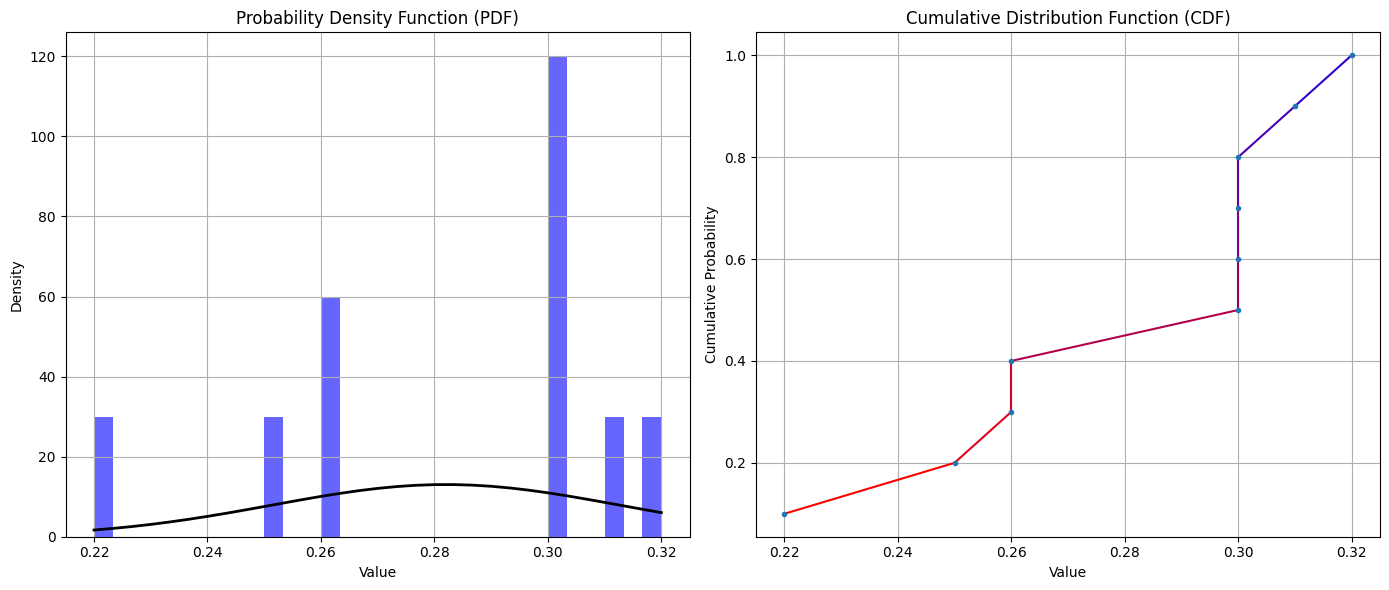

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Filtrar los datos para la iteración 10
df_10_filtered = combined_df[combined_df['iterations'] == 10]

# Valores simulados
simulated_values = df_10_filtered['success_transmition'].values

# Gráfico de PDF (Función de Densidad de Probabilidad)
plt.figure(figsize=(14, 6))

# PDF


plt.subplot(1, 2, 1)
count, bins, ignored = plt.hist(simulated_values, 30, density=True, alpha=0.6, color='b')
mu, std = norm.fit(simulated_values)
p = norm.pdf(bins, mu, std)
plt.plot(bins, p, 'k', linewidth=2)
plt.title('Probability Density Function (PDF)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

# CDF (Cumulative Distribution Function)
plt.subplot(1, 2, 2)
sorted_values = np.sort(simulated_values)
cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)

# Create a color map that transitions from red to blue
cmap = mcolors.LinearSegmentedColormap.from_list("RedBlue", ["red", "blue"])

# Plot points with a gradient color
for i in range(len(sorted_values) - 1):
    plt.plot(sorted_values[i:i+2], cdf[i:i+2], color=cmap(i / len(sorted_values)))

plt.plot(sorted_values, cdf, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()



## Mean of Collision Transmition

In [ ]:
#Simulación
df_k_10['collision_transmition'].mean()

0.5952562




\begin{equation}
\
P(\text{colisión en un preámbulo}) = 1 - P(X = 0) - P(X = 1)\
\end{equation}

In [ ]:
# Analytical Model
p_collision_analytical = 1 - (math.exp(-mean_poisson) + mean_poisson*math.exp(-mean_poisson))
p_collision_analytical

0.5939941502901619

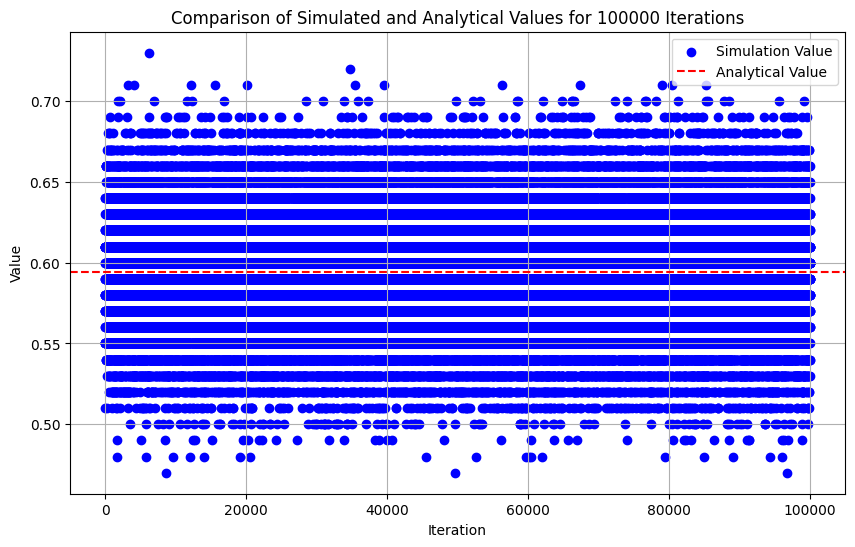

In [ ]:
# Definir el valor analítico para lambda = 2
analytical_value = p_collision_analytical

# Filtrar los datos para la iteración 10
df_10_filtered = df_k_10

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
plt.scatter(df_10_filtered.index, df_10_filtered['collision_transmition'], label='Simulation Value', color='blue')
plt.axhline(y=analytical_value, color='red', linestyle='--', label='Analytical Value')

plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title(f'Comparison of Simulated and Analytical Values for {k} Iterations')
plt.legend()
plt.grid(True)
plt.show()

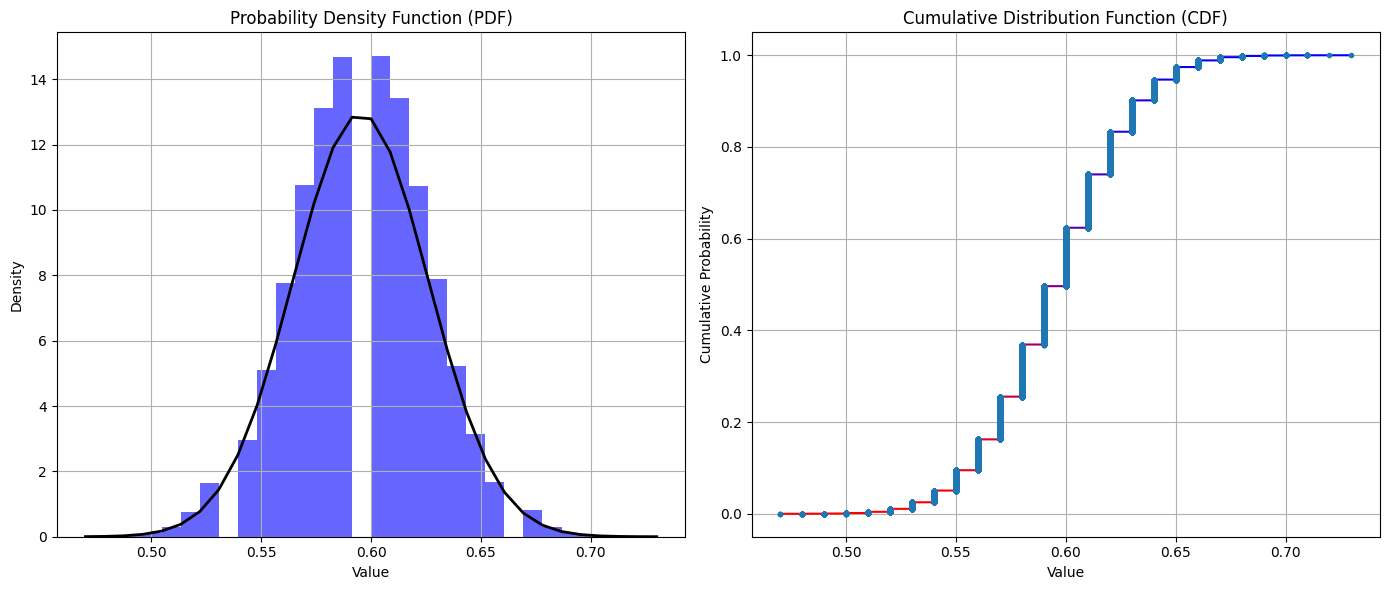

In [ ]:
# Filtrar los datos para la iteración 10
df_10_filtered = combined_df[combined_df['iterations'] == k]

# Valores simulados
simulated_values = df_10_filtered['collision_transmition'].values

# Gráfico de PDF (Función de Densidad de Probabilidad)
plt.figure(figsize=(14, 6))

# PDF


plt.subplot(1, 2, 1)
count, bins, ignored = plt.hist(simulated_values, 30, density=True, alpha=0.6, color='b')
mu, std = norm.fit(simulated_values)
p = norm.pdf(bins, mu, std)
plt.plot(bins, p, 'k', linewidth=2)
plt.title('Probability Density Function (PDF)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

# CDF (Cumulative Distribution Function)
plt.subplot(1, 2, 2)
sorted_values = np.sort(simulated_values)
cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)

# Create a color map that transitions from red to blue
cmap = mcolors.LinearSegmentedColormap.from_list("RedBlue", ["red", "blue"])

# Plot points with a gradient color
for i in range(len(sorted_values) - 1):
    plt.plot(sorted_values[i:i+2], cdf[i:i+2], color=cmap(i / len(sorted_values)))

plt.plot(sorted_values, cdf, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()


## Mean of system Utilization

In [ ]:
# Por simulacion
1 - df_k_10['preambles_not_selected'].mean()

0.8660403999999999


\begin{equation}
\
P(\text{Utilización}) = 1 - P(X = 0)\
\end{equation}

In [ ]:
## Por modelo analitico
p_utilización_sistema = 1 - math.exp(-mean_poisson)
p_utilización_sistema

0.8646647167633873

In [ ]:
1 - df_k_10['preambles_not_selected']

0        0.88
1        0.87
2        0.90
3        0.86
4        0.88
         ... 
99995    0.88
99996    0.86
99997    0.86
99998    0.89
99999    0.87
Name: preambles_not_selected, Length: 100000, dtype: float64

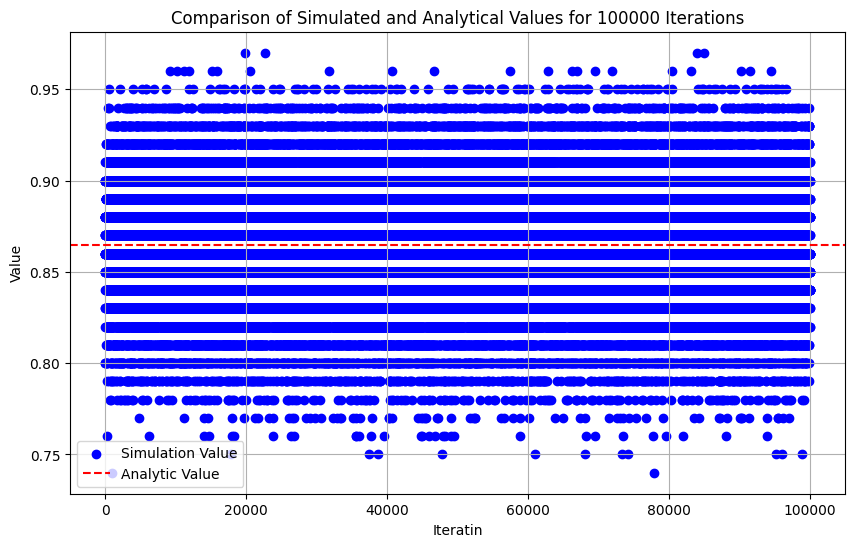

In [ ]:
data_utilization = 1 - df_k_10['preambles_not_selected']

# Definir el valor analítico para lambda = 2
analytical_value = p_utilización_sistema

# Filtrar los datos para la iteración 10
df_10_filtered = df_k_10

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
plt.scatter(df_10_filtered.index, data_utilization, label='Simulation Value', color='blue')
plt.axhline(y=analytical_value, color='red', linestyle='--', label='Analytic Value')

plt.xlabel('Iteratin')
plt.ylabel('Value')
plt.title(f'Comparison of Simulated and Analytical Values for {k} Iterations')
plt.legend()
plt.grid(True)
plt.show()

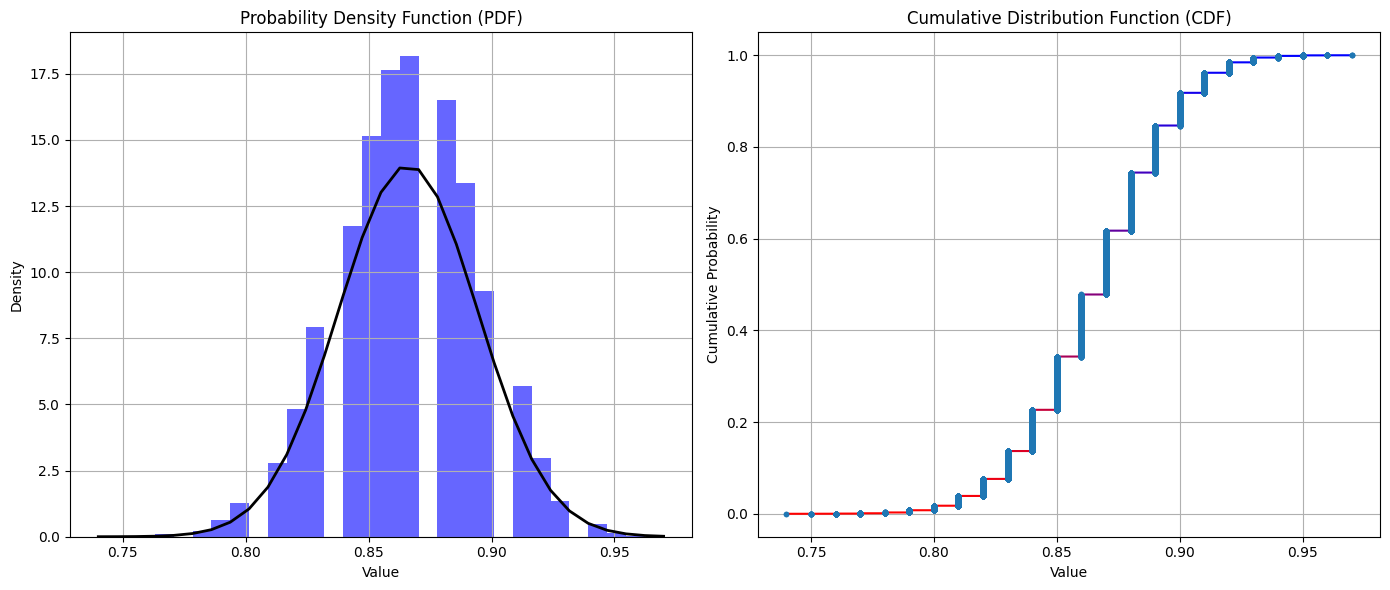

In [ ]:
# Filtrar los datos para la iteración 10
df_10_filtered = 1 - df_k_10['preambles_not_selected']

# Valores simulados
simulated_values = df_10_filtered.values

# Gráfico de PDF (Función de Densidad de Probabilidad)
plt.figure(figsize=(14, 6))

# PDF


plt.subplot(1, 2, 1)
count, bins, ignored = plt.hist(simulated_values, 30, density=True, alpha=0.6, color='b')
mu, std = norm.fit(simulated_values)
p = norm.pdf(bins, mu, std)
plt.plot(bins, p, 'k', linewidth=2)
plt.title('Probability Density Function (PDF)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

# CDF (Cumulative Distribution Function)
plt.subplot(1, 2, 2)
sorted_values = np.sort(simulated_values)
cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)

# Create a color map that transitions from red to blue
cmap = mcolors.LinearSegmentedColormap.from_list("RedBlue", ["red", "blue"])

# Plot points with a gradient color
for i in range(len(sorted_values) - 1):
    plt.plot(sorted_values[i:i+2], cdf[i:i+2], color=cmap(i / len(sorted_values)))

plt.plot(sorted_values, cdf, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()


## Number of Success Transmition in `M` channels


In [ ]:
# Cantidad de preambulos bien transmitidos, de M en total
df_k_10['success_transmition'].mean()*M

29.300000000000004

In [ ]:
## Por modelo analítico

total_channels_success = p_x_1*M
total_channels_success

27.06705664732254

## Number of Collision Transmition in `M` channels


In [ ]:
#por simulation
df_k_10['collision_transmition'].mean()*M

57.3

In [ ]:
## por modelado analitico

total_channels_collision = p_collision_analytical*M
total_channels_collision

59.39941502901619

## Number of `M` channels Used

In [ ]:
#por simulacion
(1 - df_k_10['preambles_not_selected'].mean()) * M

86.6

In [ ]:
#por analitica
total_channel_used  = p_utilización_sistema * M
total_channel_used

86.46647167633873

# Band with Utilization


In [ ]:
# Band with Utilization
B_total = 100 #100mbps

B_preambulo = B_total/M


La utilización efectiva del sistema, como se derivó anteriormente, es:



In [ ]:
U_efectiva = p_utilización_sistema


- B_total = 100 Mbps (Megabits por segundo)
- M=100 channels
- 𝜆 = 2
- U_efectiva =  Utilización efectiva


In [ ]:
U_efectiva

0.8646647167633873

In [ ]:
B_utilizado = B_total * U_efectiva

print(f'Ancho de banda utilizado = {round(B_utilizado,2)} Mbps')

Ancho de banda utilizado = 86.47 Mbps


In [ ]:
## Gráfica
